In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
cycling = pd.read_csv("bike_rides.csv")
cycling.head()

,timestamp,power,heart-rate,cadence,speed,acceleration,slope
0,2020-08-18 14:43:19,150.0,102.0,64.0,4.325,0.0880,-0.033870
1,2020-08-18 14:43:20,161.0,103.0,64.0,4.336,0.0842,-0.033571
2,2020-08-18 14:43:21,163.0,105.0,66.0,4.409,0.0234,-0.033223
3,2020-08-18 14:43:22,156.0,106.0,66.0,4.445,0.0016,-0.032908
4,2020-08-18 14:43:23,148.0,106.0,67.0,4.441,0.1144,0.000000


In [3]:
df = pd.read_csv('bike_rides.csv')

In [4]:
df.tail()

,timestamp,power,heart-rate,cadence,speed,acceleration,slope
38249,2020-09-13 14:55:57,0.0,130.0,0.0,1.054,0.0234,0.0
38250,2020-09-13 14:55:58,0.0,130.0,0.0,0.829,0.0258,0.0
38251,2020-09-13 14:55:59,0.0,129.0,0.0,0.616,-0.1686,0.0
38252,2020-09-13 14:56:00,0.0,130.0,0.0,0.000,-0.4284,0.0
38253,2020-09-13 14:56:01,0.0,130.0,0.0,0.000,-0.3096,0.0


In [5]:
df.describe

<bound method NDFrame.describe of                  timestamp  power  heart-rate  cadence  speed  acceleration  \
0      2020-08-18 14:43:19  150.0       102.0     64.0  4.325        0.0880   
1      2020-08-18 14:43:20  161.0       103.0     64.0  4.336        0.0842   
2      2020-08-18 14:43:21  163.0       105.0     66.0  4.409        0.0234   
3      2020-08-18 14:43:22  156.0       106.0     66.0  4.445        0.0016   
4      2020-08-18 14:43:23  148.0       106.0     67.0  4.441        0.1144   
...                    ...    ...         ...      ...    ...           ...   
38249  2020-09-13 14:55:57    0.0       130.0      0.0  1.054        0.0234   
38250  2020-09-13 14:55:58    0.0       130.0      0.0  0.829        0.0258   
38251  2020-09-13 14:55:59    0.0       129.0      0.0  0.616       -0.1686   
38252  2020-09-13 14:56:00    0.0       130.0      0.0  0.000       -0.4284   
38253  2020-09-13 14:56:01    0.0       130.0      0.0  0.000       -0.3096   

          slope  

In [6]:
cycling = pd.read_csv(
    "bike_rides.csv", index_col=0, parse_dates=True
)
cycling.index.name = ""
cycling.head()

,power,heart-rate,cadence,speed,acceleration,slope
,,,,,,
2020-08-18 14:43:19,150.0,102.0,64.0,4.325,0.0880,-0.033870
2020-08-18 14:43:20,161.0,103.0,64.0,4.336,0.0842,-0.033571
2020-08-18 14:43:21,163.0,105.0,66.0,4.409,0.0234,-0.033223
2020-08-18 14:43:22,156.0,106.0,66.0,4.445,0.0016,-0.032908
2020-08-18 14:43:23,148.0,106.0,67.0,4.441,0.1144,0.000000


In [7]:
cycling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38254 entries, 2020-08-18 14:43:19 to 2020-09-13 14:56:01
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   power         38254 non-null  float64
 1   heart-rate    38254 non-null  float64
 2   cadence       38254 non-null  float64
 3   speed         38254 non-null  float64
 4   acceleration  38254 non-null  float64
 5   slope         38254 non-null  float64
dtypes: float64(6)
memory usage: 2.0 MB


In [8]:
target_name = "power"
data, target = cycling.drop(columns=target_name), cycling[target_name]

In [9]:
date_first_ride = "2020-08-18"
cycling_ride = cycling.loc[date_first_ride]
data_ride, target_ride = data.loc[date_first_ride], target.loc[date_first_ride]

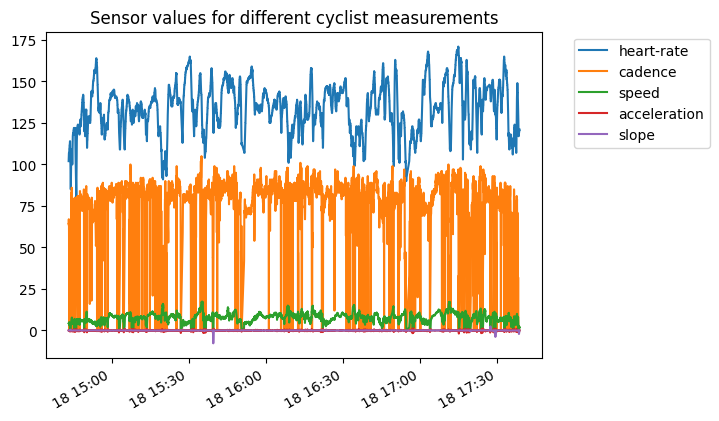

In [10]:
data_ride.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Sensor values for different cyclist measurements")

In [11]:
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(cycling_ride.shape[0]), size=500, replace=False)

In [12]:
subset = cycling_ride.iloc[indices].copy()
# Quantize the target and keep the midpoint for each interval
subset["power"] = pd.qcut(subset["power"], 6, retbins=False)
subset["power"] = subset["power"].apply(lambda x: x.mid)

In [14]:
print(df.columns)

Index(['timestamp', 'power', 'heart-rate', 'cadence', 'speed', 'acceleration',
       'slope'],
      dtype='object')


In [15]:
df = pd.read_csv('bike_rides.csv')
df.describe(include="all")

,timestamp,power,heart-rate,cadence,speed,acceleration,slope
count,38254,38254.000000,38254.000000,38254.000000,38254.000000,38254.000000,38254.000000
unique,38254,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-08-18 14:43:19,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,192.847781,141.385616,72.896876,8.203325,-0.002056,0.005646
std,NaN,116.760026,16.562215,25.235907,2.603563,0.225916,0.108174
min,NaN,0.000000,66.000000,0.000000,0.000000,-2.384600,-7.731092
25%,NaN,134.000000,131.000000,73.000000,6.579000,-0.074400,0.000000
50%,NaN,199.000000,142.000000,82.000000,8.297000,0.005800,0.000000
75%,NaN,248.000000,153.000000,87.000000,9.874000,0.083800,0.010134


In [16]:
shape = df.shape
print(shape)

(38254, 7)


In [17]:
missing_values = df.isnull().sum()
print(missing_values)

df_cleaned = df.dropna()

timestamp       0
power           0
heart-rate      0
cadence         0
speed           0
acceleration    0
slope           0
dtype: int64


In [19]:
import pandas as pd

# Load the dataset
file_path = 'bike_rides.csv'
bike_rides_df = pd.read_csv(file_path)

# Calculate the length of each row
row_lengths = bike_rides_df.apply(lambda row: len(row), axis=1)

# Create a new DataFrame to display row index and its length
row_lengths_df = pd.DataFrame({'Row Index': row_lengths.index, 'Length': row_lengths.values})

# Print the DataFrame
print(row_lengths_df)


       Row Index  Length
0              0       7
1              1       7
2              2       7
3              3       7
4              4       7
...          ...     ...
38249      38249       7
38250      38250       7
38251      38251       7
38252      38252       7
38253      38253       7

[38254 rows x 2 columns]


In [20]:
import pandas as pd

file_path = 'bike_rides.csv'  
bike_rides_df = pd.read_csv(file_path)

column_lengths = bike_rides_df.count()

print("Length of each column:")
for col, length in column_lengths.items():
    print(f"{col}: {length}")


Length of each column:
timestamp: 38254
power: 38254
heart-rate: 38254
cadence: 38254
speed: 38254
acceleration: 38254
slope: 38254


In [21]:
import pandas as pd

filename = 'bike_rides.csv'
df = pd.read_csv(filename)

print('Loaded data file {0} with {1} rows and {2} columns'.format(filename, df.shape[0], df.shape[1]))

# Convert only numeric columns to float
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].astype(float)

# Print the first row after conversion to float
print("First row after conversion to float:")
print(df.iloc[0])

Loaded data file bike_rides.csv with 38254 rows and 7 columns
First row after conversion to float:
timestamp       2020-08-18 14:43:19
power                         150.0
heart-rate                    102.0
cadence                        64.0
speed                         4.325
acceleration                  0.088
slope                      -0.03387
Name: 0, dtype: object


In [22]:
# Standard deviation
file_path = 'bike_rides.csv'
data = pd.read_csv(file_path)

numeric_data = data.select_dtypes(include=['float64', 'int64'])

column_std_devs = numeric_data.std()

print("Standard Deviations for each numeric column:")
print(column_std_devs)

Standard Deviations for each numeric column:
power           116.760026
heart-rate       16.562215
cadence          25.235907
speed             2.603563
acceleration      0.225916
slope             0.108174
dtype: float64


In [23]:
# Normalization
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

filename = 'bike_rides.csv'
df = pd.read_csv(filename)

numeric_columns = df.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("First row after normalization:")
print(df.iloc[0])

First row after normalization:
timestamp       2020-08-18 14:43:19
power                      0.166482
heart-rate                 0.297521
cadence                    0.598131
speed                      0.232477
acceleration               0.668994
slope                      0.340762
Name: 0, dtype: object


In [24]:
import pandas as pd

# Load the dataset
file_path = 'bike_rides.csv'
bike_rides_df = pd.read_csv(file_path)

# Generate summary statistics for the dataset
summary = bike_rides_df.describe(include='all')

# Display the summary
print(summary)


                  timestamp         power    heart-rate       cadence  \
count                 38254  38254.000000  38254.000000  38254.000000   
unique                38254           NaN           NaN           NaN   
top     2020-08-18 14:43:19           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
mean                    NaN    192.847781    141.385616     72.896876   
std                     NaN    116.760026     16.562215     25.235907   
min                     NaN      0.000000     66.000000      0.000000   
25%                     NaN    134.000000    131.000000     73.000000   
50%                     NaN    199.000000    142.000000     82.000000   
75%                     NaN    248.000000    153.000000     87.000000   
max                     NaN    901.000000    187.000000    107.000000   

               speed  acceleration         slope  
count   38254.000000  38254.000000  38254.000000  
unique           NaN 

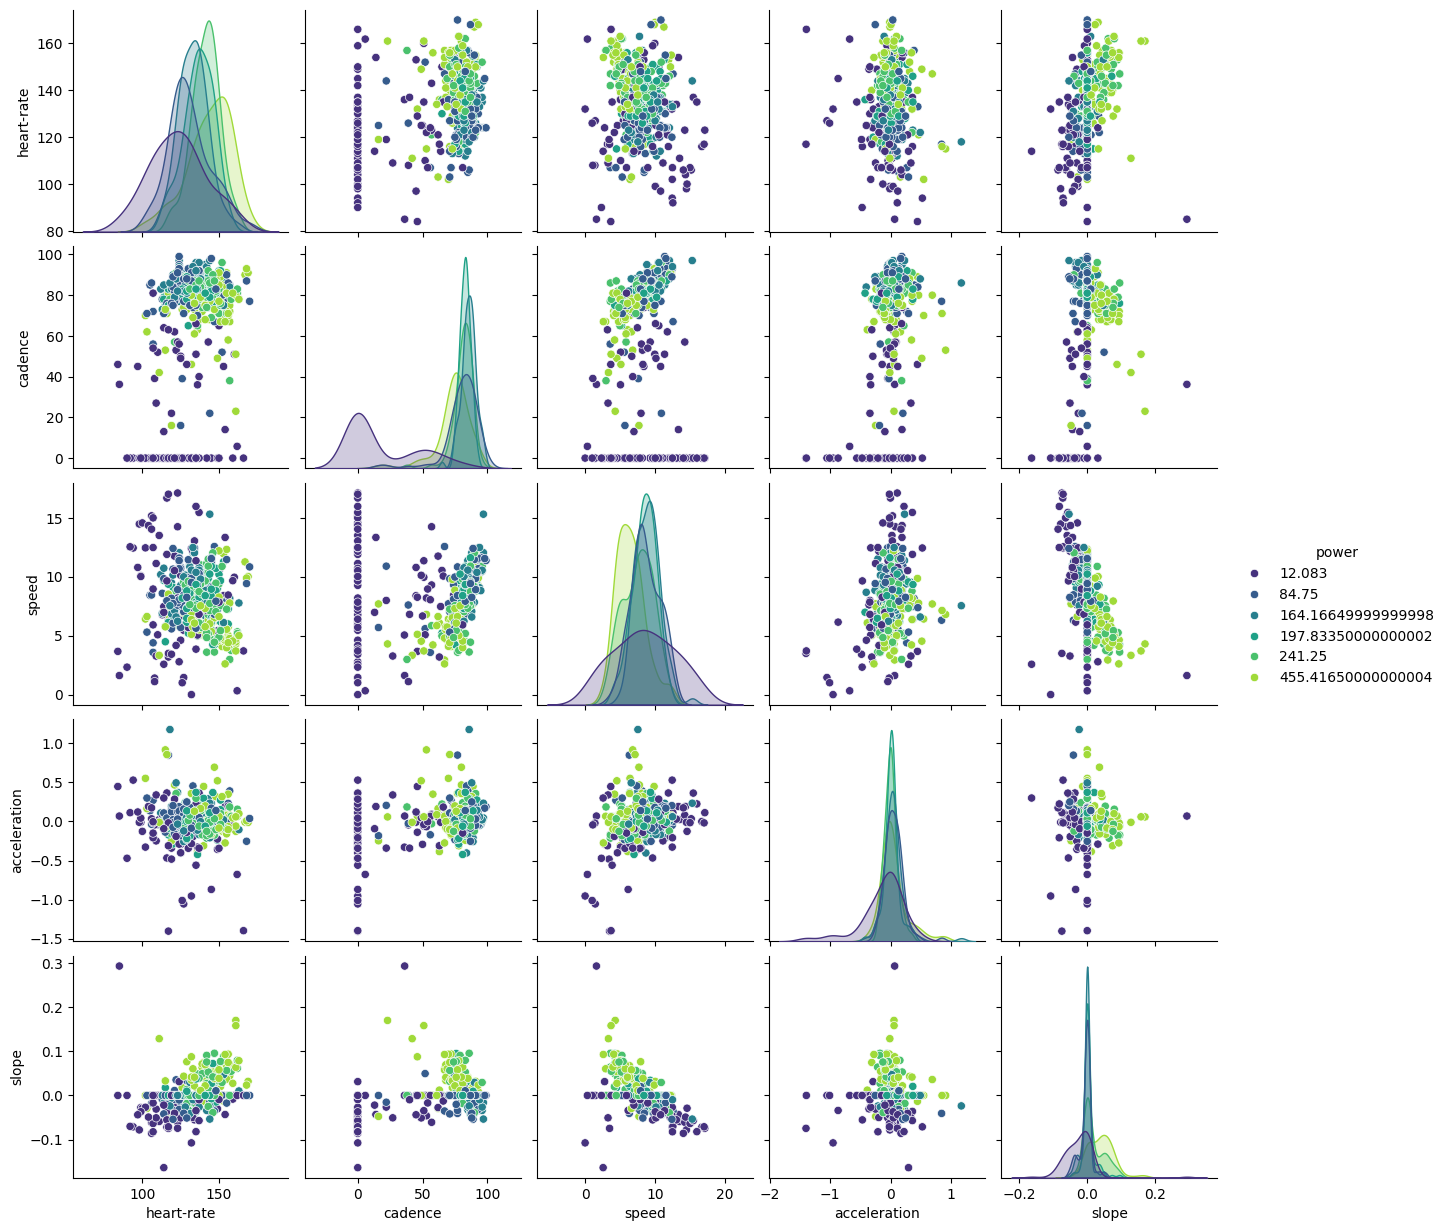

In [13]:
import seaborn as sns

_ = sns.pairplot(data=subset, hue="power", palette="viridis")

Total Duration: 26 days 00:12:42
Total Distance: 18434.20 km
Average Speed: 8.20 m/s
Total Elevation Gain: 501.63 degrees


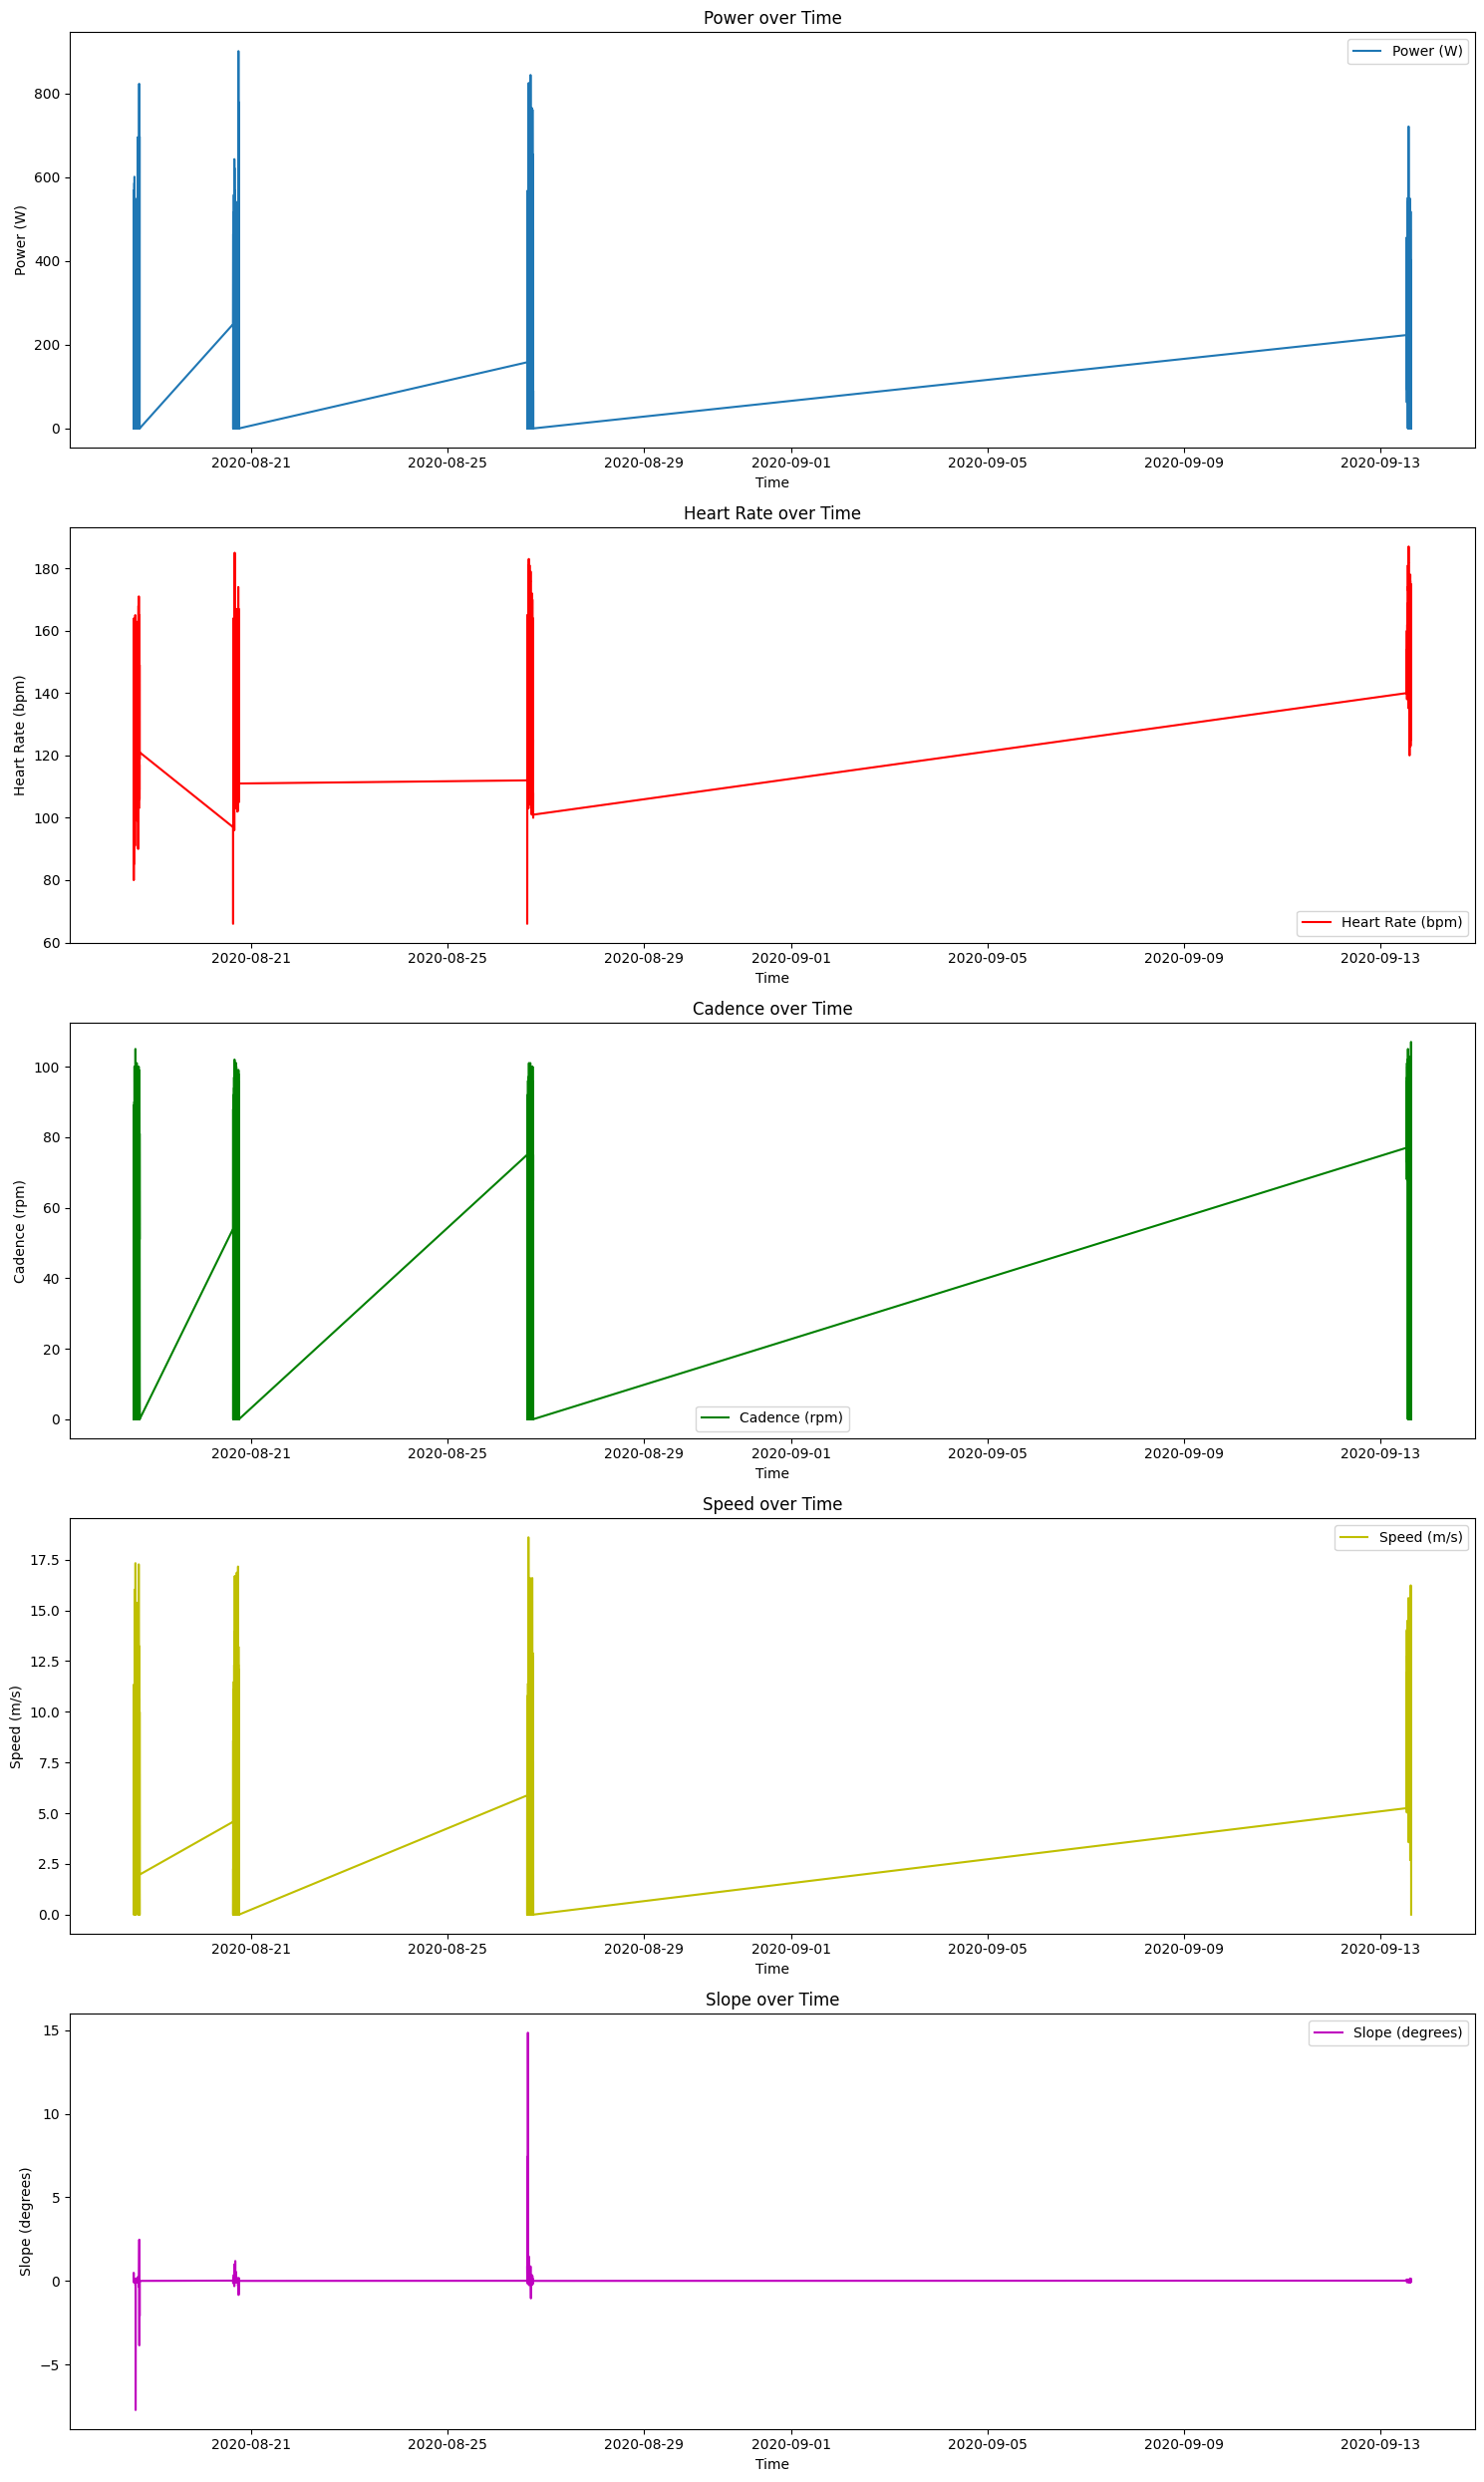

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'bike_rides.csv'
bike_rides_df = pd.read_csv(file_path)

bike_rides_df['timestamp'] = pd.to_datetime(bike_rides_df['timestamp'])

total_duration = bike_rides_df['timestamp'].max() - bike_rides_df['timestamp'].min()

total_distance = (bike_rides_df['speed'].mean() * total_duration.total_seconds()) / 1000

average_speed = bike_rides_df['speed'].mean()

total_elevation_gain = bike_rides_df[bike_rides_df['slope'] > 0]['slope'].sum()

# Overall Ride Metrics
print(f"Total Duration: {total_duration}")
print(f"Total Distance: {total_distance:.2f} km")
print(f"Average Speed: {average_speed:.2f} m/s")
print(f"Total Elevation Gain: {total_elevation_gain:.2f} degrees")

fig, axs = plt.subplots(5, 1, figsize=(15, 25))
# Power over Time
axs[0].plot(bike_rides_df['timestamp'], bike_rides_df['power'], label='Power (W)')
axs[0].set_title('Power over Time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Power (W)')
axs[0].legend()

#  Heart Rate over Time
axs[1].plot(bike_rides_df['timestamp'], bike_rides_df['heart-rate'], label='Heart Rate (bpm)', color='r')
axs[1].set_title('Heart Rate over Time')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Heart Rate (bpm)')
axs[1].legend()

# Cadence over Time
axs[2].plot(bike_rides_df['timestamp'], bike_rides_df['cadence'], label='Cadence (rpm)', color='g')
axs[2].set_title('Cadence over Time')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Cadence (rpm)')
axs[2].legend()

# Speed over Time
axs[3].plot(bike_rides_df['timestamp'], bike_rides_df['speed'], label='Speed (m/s)', color='y')
axs[3].set_title('Speed over Time')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Speed (m/s)')
axs[3].legend()

# Plot Slope over Time
axs[4].plot(bike_rides_df['timestamp'], bike_rides_df['slope'], label='Slope (degrees)', color='m')
axs[4].set_title('Slope over Time')
axs[4].set_xlabel('Time')
axs[4].set_ylabel('Slope (degrees)')
axs[4].legend()

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Load the dataset
file_path = 'bike_rides.csv'
df = pd.read_csv(file_path)

In [27]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df = df.drop('timestamp', axis=1)

In [28]:
# Define feature columns & target column
features = [ 'heart-rate', 'cadence', 'speed', 'acceleration', 'slope']
target = 'power' 

In [29]:
# Prepare the data
X = bike_rides_df[features]
y = bike_rides_df[target]

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [31]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


MAE: 64.73786019238321
MSE: 8410.014537732899
RMSE: 91.70613140751767
R^2: 0.3878714339774736


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
# Load the CSV file
file_path = 'bike_rides.csv'
bike_rides_df = pd.read_csv(file_path)

In [36]:
# Define the features and target variable
X = bike_rides_df[['heart-rate', 'cadence', 'speed', 'acceleration', 'slope']]
y = bike_rides_df['power']

In [37]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Train a KNN model with default number of neighbors (5)
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [40]:
# Predict on the test set
y_pred = knn.predict(X_test_scaled)

In [41]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [42]:
# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 42.99271990589465
Mean Squared Error (MSE): 4888.520231342308
Root Mean Squared Error (RMSE): 69.91795356946818
R² Score: 0.6286686791187405


In [ ]:
# Feature 

In [43]:
import pandas as pd

file_path = 'bike_rides.csv'
bike_rides_df = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime
bike_rides_df['timestamp'] = pd.to_datetime(bike_rides_df['timestamp'])

# Now you can extract hour and minute
bike_rides_df['hour'] = bike_rides_df['timestamp'].dt.hour
bike_rides_df['minute'] = bike_rides_df['timestamp'].dt.minute

# Display the dataframe with the new features
print(bike_rides_df.head())


            timestamp  power  heart-rate  cadence  speed  acceleration  \
0 2020-08-18 14:43:19  150.0       102.0     64.0  4.325        0.0880   
1 2020-08-18 14:43:20  161.0       103.0     64.0  4.336        0.0842   
2 2020-08-18 14:43:21  163.0       105.0     66.0  4.409        0.0234   
3 2020-08-18 14:43:22  156.0       106.0     66.0  4.445        0.0016   
4 2020-08-18 14:43:23  148.0       106.0     67.0  4.441        0.1144   

      slope  hour  minute  
0 -0.033870    14      43  
1 -0.033571    14      43  
2 -0.033223    14      43  
3 -0.032908    14      43  
4  0.000000    14      43  


In [44]:
# Create interaction term between heart-rate and cadence
bike_rides_df['hr_cadence'] = bike_rides_df['heart-rate'] * bike_rides_df['cadence']

# Display the dataframe with the new feature
bike_rides_df.head()


,timestamp,power,heart-rate,cadence,speed,acceleration,slope,hour,minute,hr_cadence
0,2020-08-18 14:43:19,150.0,102.0,64.0,4.325,0.0880,-0.033870,14,43,6528.0
1,2020-08-18 14:43:20,161.0,103.0,64.0,4.336,0.0842,-0.033571,14,43,6592.0
2,2020-08-18 14:43:21,163.0,105.0,66.0,4.409,0.0234,-0.033223,14,43,6930.0
3,2020-08-18 14:43:22,156.0,106.0,66.0,4.445,0.0016,-0.032908,14,43,6996.0
4,2020-08-18 14:43:23,148.0,106.0,67.0,4.441,0.1144,0.000000,14,43,7102.0


In [45]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Load the data
file_path = 'bike_rides.csv'
bike_rides_df = pd.read_csv(file_path)

# Convert timestamp to datetime and extract features
bike_rides_df['timestamp'] = pd.to_datetime(bike_rides_df['timestamp'])
bike_rides_df['hour'] = bike_rides_df['timestamp'].dt.hour
bike_rides_df['minute'] = bike_rides_df['timestamp'].dt.minute
bike_rides_df['hr_cadence'] = bike_rides_df['heart-rate'] * bike_rides_df['cadence']

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(bike_rides_df[['speed', 'acceleration', 'slope']])
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['speed', 'acceleration', 'slope']))

# Combine original and engineered features
bike_rides_df = pd.concat([bike_rides_df, poly_features_df], axis=1)

# Display the dataframe with the new features
bike_rides_df.head()


,timestamp,power,heart-rate,cadence,speed,acceleration,slope,hour,minute,hr_cadence,speed,acceleration,slope,speed^2,speed acceleration,speed slope,acceleration^2,acceleration slope,slope^2
0,2020-08-18 14:43:19,150.0,102.0,64.0,4.325,0.0880,-0.033870,14,43,6528.0,4.325,0.0880,-0.033870,18.705625,0.380600,-0.146486,0.007744,-0.002981,0.001147
1,2020-08-18 14:43:20,161.0,103.0,64.0,4.336,0.0842,-0.033571,14,43,6592.0,4.336,0.0842,-0.033571,18.800896,0.365091,-0.145564,0.007090,-0.002827,0.001127
2,2020-08-18 14:43:21,163.0,105.0,66.0,4.409,0.0234,-0.033223,14,43,6930.0,4.409,0.0234,-0.033223,19.439281,0.103171,-0.146478,0.000548,-0.000777,0.001104
3,2020-08-18 14:43:22,156.0,106.0,66.0,4.445,0.0016,-0.032908,14,43,6996.0,4.445,0.0016,-0.032908,19.758025,0.007112,-0.146277,0.000003,-0.000053,0.001083
4,2020-08-18 14:43:23,148.0,106.0,67.0,4.441,0.1144,0.000000,14,43,7102.0,4.441,0.1144,0.000000,19.722481,0.508050,0.000000,0.013087,0.000000,0.000000


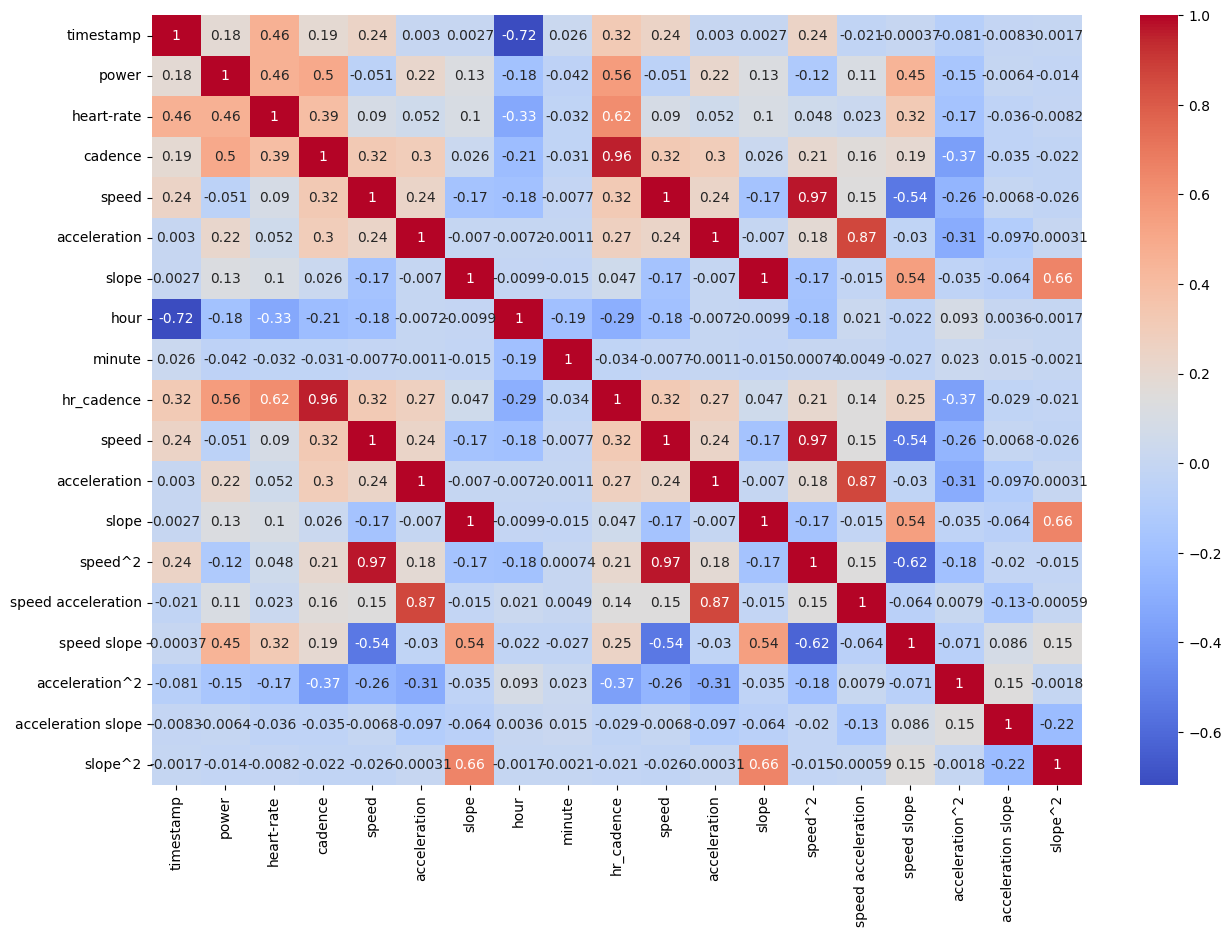

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation analysis
corr_matrix = bike_rides_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


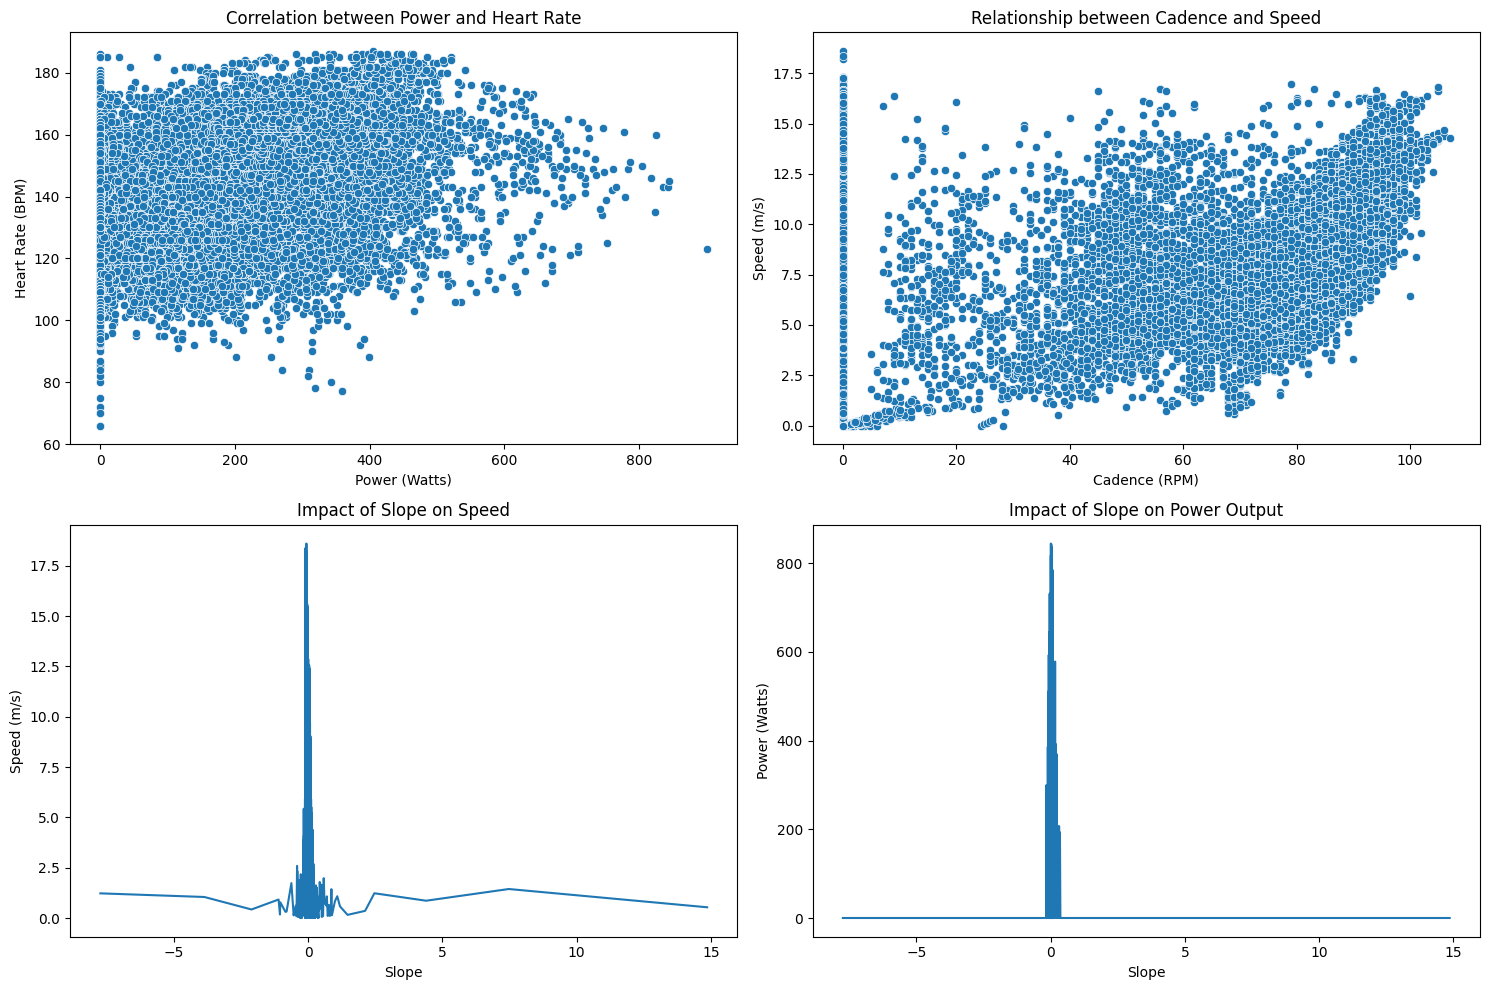

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'bike_rides.csv'
data = pd.read_csv(file_path)

# Set the size of the entire figure
plt.figure(figsize=(15, 10))

# Create a 2x2 grid of subplots

# Plot 1: Correlation between power and heart rate
plt.subplot(2, 2, 1)
sns.scatterplot(x='power', y='heart-rate', data=data)
plt.title('Correlation between Power and Heart Rate')
plt.xlabel('Power (Watts)')
plt.ylabel('Heart Rate (BPM)')

# Plot 2: Relationship between cadence and speed
plt.subplot(2, 2, 2)
sns.scatterplot(x='cadence', y='speed', data=data)
plt.title('Relationship between Cadence and Speed')
plt.xlabel('Cadence (RPM)')
plt.ylabel('Speed (m/s)')

# Plot 3: Impact of slope on speed
plt.subplot(2, 2, 3)
sns.lineplot(x='slope', y='speed', data=data)
plt.title('Impact of Slope on Speed')
plt.xlabel('Slope')
plt.ylabel('Speed (m/s)')

# Plot 4: Impact of slope on power output
plt.subplot(2, 2, 4)
sns.lineplot(x='slope', y='power', data=data)
plt.title('Impact of Slope on Power Output')
plt.xlabel('Slope')
plt.ylabel('Power (Watts)')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

file_path = 'bike_rides.csv'
bike_rides_df = pd.read_csv(file_path)

bike_rides_df['timestamp'] = pd.to_datetime(bike_rides_df['timestamp'])
bike_rides_df['hour'] = bike_rides_df['timestamp'].dt.hour
bike_rides_df['minute'] = bike_rides_df['timestamp'].dt.minute
bike_rides_df['hr_cadence'] = bike_rides_df['heart-rate'] * bike_rides_df['cadence']

# Generate polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(bike_rides_df[['speed', 'acceleration', 'slope']])
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['speed', 'acceleration', 'slope']))

bike_rides_df = pd.concat([bike_rides_df, poly_features_df], axis=1)

#X = bike_rides_df.drop(columns=['timestamp', 'speed'])
X = bike_rides_df.drop(columns=['timestamp', 'power'])
y = bike_rides_df['power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Get feature importances (absolute values of coefficients)
importances = np.abs(lr.coef_)
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking based on Linear Regression coefficients:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

coefficients = lr.coef_
print("\nCoefficients with signs:")
for i, col in enumerate(X_train.columns):
    print(f"{col}: {coefficients[i]}")


Feature ranking based on Linear Regression coefficients:
1. Feature acceleration slope (455.80333900181427)
2. Feature speed slope (197.1700128020298)
3. Feature acceleration (134.52146037030377)
4. Feature acceleration (134.52146037030332)
5. Feature acceleration^2 (127.59376944445839)
6. Feature slope (81.74630124918411)
7. Feature slope (81.74630124918377)
8. Feature speed acceleration (28.624613890992514)
9. Feature speed (10.299065952827215)
10. Feature speed (10.29906595282691)
11. Feature hour (2.2279776937417473)
12. Feature speed^2 (1.272463533469961)
13. Feature slope^2 (1.000998301992388)
14. Feature heart-rate (0.6999322567736378)
15. Feature minute (0.1506441216316727)
16. Feature cadence (0.0690455796961631)
17. Feature hr_cadence (0.01201737370437383)

Coefficients with signs:
heart-rate: 0.6999322567736378
cadence: 0.0690455796961631
speed: -10.29906595282691
acceleration: 134.52146037030332
slope: -81.74630124918411
hour: -2.2279776937417473
minute: -0.1506441216316727

In [49]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Load the data
file_path = 'bike_rides.csv'
bike_rides_df = pd.read_csv(file_path)

# Convert timestamp to datetime and extract features
bike_rides_df['timestamp'] = pd.to_datetime(bike_rides_df['timestamp'])
bike_rides_df['hour'] = bike_rides_df['timestamp'].dt.hour
bike_rides_df['minute'] = bike_rides_df['timestamp'].dt.minute
bike_rides_df['hr_cadence'] = bike_rides_df['heart-rate'] * bike_rides_df['cadence']

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(bike_rides_df[['speed', 'acceleration', 'slope']])
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['speed', 'acceleration', 'slope']))

# Combine original and engineered features
bike_rides_df = pd.concat([bike_rides_df, poly_features_df], axis=1)

# Select features and target variable
X = bike_rides_df.drop(columns=['timestamp', 'power'])
y = bike_rides_df['power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
n_components = min(X_train.shape[1], 8)
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and evaluate the model using PCA-transformed features
model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

# Evaluate the model
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
rmse_pca = np.sqrt(mse_pca)

print(f'Mean Squared Error (PCA): {mse_pca}')
print(f'R^2 Score (PCA): {r2_pca}')
print(f'Mean Absolute Error (PCA): {mae_pca}')
print(f'Root Mean Squared Error (PCA): {rmse_pca}')


Mean Squared Error (PCA): 7974.450052503159
R^2 Score (PCA): 0.3942618765669831
Mean Absolute Error (PCA): 63.63703561817272
Root Mean Squared Error (PCA): 89.2997763295248


Accuracy: 1.0
Confusion Matrix:
[[3568    0]
 [   0 4083]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3568
           1       1.00      1.00      1.00      4083

    accuracy                           1.00      7651
   macro avg       1.00      1.00      1.00      7651
weighted avg       1.00      1.00      1.00      7651



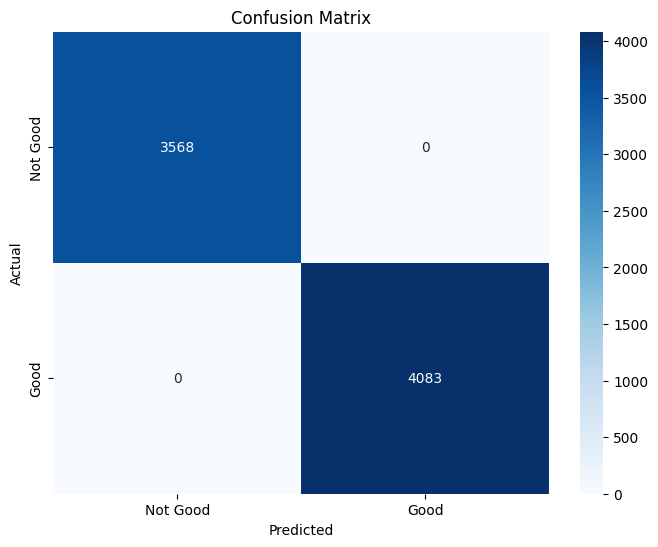

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = 'bike_rides.csv'
df = pd.read_csv(file_path)

df = df.drop(columns=['timestamp'])

# Assuming 'target' is the column we want to predict
df['target'] = df['power'] > df['power'].mean()  # Example: target is 'Good' if power > average power

# Convert target to binary
df['target'] = df['target'].astype(int)

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Good', 'Good'], yticklabels=['Not Good', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()